In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import scipy as sp
import sklearn
import mglearn

### 회귀의 선형 모델

* y(hat)= w[0]X x[0] + w[1]Xx[1]+...+w[p]Xx[p]+b


* y(hat) = w[0] X x[0] + b

* w[0]은 기울기, b는 y축과 만나는 절편이다.

* 특성이 많아지면 w는 각 특성에 해당하는 기울기를 모두 가진다.

* --> 예측값 = 입력특성에 w의 각 가중치(음수일 수도 있음)를 곱해서 더운 가중치의 합으로 볼 수 있다.

w[0]: 0.393906  b: -0.031804


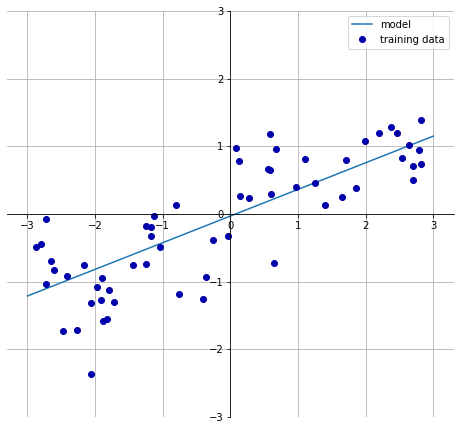

In [3]:
mglearn.plots.plot_linear_regression_wave()

* 회귀를 위한 선형 모델은 특성이 하나일 땐 직선

* 두개일 땐 평면

* 더 높은 차원에서는 초평면이 되는 회귀 모델의 특징을 가진다.

* 여기서의 직선 (예측)은 좀 제약이 많아 보인다. 데이터의 상세정보를 잃은 것처럼 보인다는 것이다 ! 맞다, 좀 비현실적이긴 하다.

* But, 1차원 그래프만 봐서 생긴 편견일 수 있다 !

* 특성이 많다면, 선형모델은 매우 훌륭한 성능을 뽐낼 수 있다 !

### 특히 훈련데이터보다 특성이 더 많은 경우에 어떤 타깃 y도 완벽하게 (훈련 세트에 대해서) 선형 함수로 모델링 할 수 있습니다 !

## -------------------------------------------------------------

다양한 회귀를 위한 선형모델들이 존재한다. 

* 훈련 데이터로부터 모델 파라미터 w와 b를 학습하는 방법,
* 모델의 복잡도를 제어하는 방법

에서 차이가 난다.

### 인기 있는 선형 모델들

* 선형 회귀( 최소제곱법 )

* 리지 회귀

* 라소

* 분류형 선형 모델

* 다중 클래스 분류형 선형 모델

## 선형 회귀 (최소제곱법)

- 선형 회귀 (최소제곱법)은 가장 간단하고 오래된 선형 알고리즘으로서, 

- 예측 (그래프)와 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(mean squared)를 최소화하는 파라미터 w와 b를 찾는다.



- 평균제곱(mean squared)란 ? 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플 개수로 나눈 것.

- 선형 회귀는 매개변수가 없는 것이 장점이면서 모델의 복잡도를 제어할 수 있는 방법이 없다는 것 또한 단점.


In [4]:
# 선형 모델 만들어보기
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42) 

lr = LinearRegression().fit(X_train, y_train)

- 기울기 파라미터 (w)는 가중치(weight) 또는 계수(coefficient)라고도 칭한다. 
- lr 객체의 coef_ 속성에 저장되어있다. lr.coef_



- 편향(offset) 또는 절편(intercept) 파라미터 (b)는 intercept_ 속성에 저장되어 있다 ! lr.intercept_

- intercept_ 속성은 항상 실수(float)값 하나이지만, coef_속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열이다 !

- 여기서는 입력 특성이 딱 하나뿐이므로 lr.coef_도 원소를 하나만 가지고 있다.

In [5]:
#훈련 세트와 테스트 세트의 성능 확인
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))


훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


- R^2 값이 0.66이다 ? 좋지 않다. 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷하다.
- 이는 과대적합X, 과소적합임을 의미한다.

- 1차원 데이터셋에서는 모델이 매우 단순하기 때문에 과대적합을 걱정할 필요가 없긴하다. 

- But, 특성(차원)이 많은 데이터 셋에서는 선형 모델의 성능이 매우 높아져서 과대적합이 될 가능성이 높다.

- 복잡한 모델에서는 LinearRegression model이 어떻게 작동할까 ? 샘플이 506개이고 특성이 104개인 보스턴 주택가격 데이터셋으로 한번 보자.


In [6]:
# 데이터 셋 읽어들이기
X, y = mglearn.datasets.load_extended_boston()
# 훈련 데이터와 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)
# 선형 모델 만들기
lr = LinearRegression().fit(X_train, y_train)

In [7]:
#훈련 세트의 점수 출력
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
#테스트 세트의 점수 출력
print("테스트 세트 점수 {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수 0.61


- 이것은 과대적합 되었다는 신호 (훈련 세트의 정확도가 테스트 세트에 비해서 과하게 잘 나오는 경우)
- 이럴 때는, 복잡도를 제어하는 모델을 사용해야 한다. 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델 -> 리지 회귀!

### 리지 회귀

-  리지(Ridge)도 회귀를 위한 선형 모델이므로 최소 적합법에서 사용한 것과 같은 예측 함수를 사용한다 !

- 하지만 리지 회귀에서의 가중지(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 ! 

#### 추가 제약 조건을 만족시키기 위한 목적도 있다 !

#### 무슨 말인고 하니, 가중치의 절댓값을 가능한 한 작게 만드는 것 = w의 모든 원소가 0에 가깝게 되길 원한다.

#### -----> 모든 특성이 출력에 주는 영향을 최소한으로 만든다 ! (기울기(w)를 작게 만든다!)

#### 이런 제약을 [규제regrularization](: 과대적합이 되지 않도록 모델을 강제로 제한)이라고 한다. 

#### 리지 회귀에서 사용하는 규제 방식 = L2 규제

In [8]:
# 리지 회귀는 linear_model.Ridge에 구현 되어있다.
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- LinearRegression보다 훈련 세트 점수는 낮아졌지만 테스트 세트의 점수는 높아졌다.
- LinearRegression 은 과대적합되지만 리지는 규제로 인해 덜 자유롭기 때문에 과대적합이 적어진다 !
- 모델의 복잡도 낮아질수록, 훈련세트의 성능 낮아진다. But 일반화 높아진다.
- ---> 우리가 관심있는 것은 테스트세트의 성능. So 우리는 리지를 선택해야 한다 !

- Ridge 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공한다.

- 사용자는 alpha 매개변수를 통해서 훈련 세트의 성능 대비 모델을 얼마나 단순화할 지를 지정할 수 있다. 

- alpha 매개변수의 디폴트 값은 alpha = 1.0

- 이 값이 최적일 이유 없다. 데이터셋에 따라서 최적의 alpha값이 정해진다 ! 

- alpha 값 증가, w(계수) 0으로 가까워짐 -> 훈련 데이터 점수 나빠짐 ( 동시에 훈련 셋 일반화)

In [9]:
#alpha 매개변수 값 조정 (하이퍼 파라미터이겠군), alpha값 크게 조정, 규제 up, 훈련 셋 정확도 낮, 일반화 up

ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


- alpha값을 줄이면 ? 규제 down, 훈련 셋 학습 효과 더 커지고 , 복잡성 더 올라간다.


In [10]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))


훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


- 이렇게 매개변수 alpha를 세가지 값과 함께 튜닝하여 봤을 때, alpha = 0.1을 적용하였을 때 테스트셋 정확도가 제일 좋게 나타난다.


- 테스트 세트에 대한 성능이 높아질 때 까지 alpha 값을 줄일 수 있을 것이다.

- alpha값 ? 모델의 복잡도와 관련 (규제 !)

- 좋은 매개변수를 선택하는 것은 5장에서 to be continued ...

- 알파값 규제로 인해서 일반화가 된다는 것은 그만큼 각 특성의 기울기(가중치)가 완만하게 변한다는 것이다 (w가 점점 0으로)

- 그렇다면 w의 변화가 어떻게 진행되는지 알아보자. 이것을 살펴보면 alpha값이 모델을 어떻게 변경하는지에 대해서 이해가 더 

- 쉬워질 것이다 !

- 높은 알파값 - > 규제 up -> 일반화 up and 기울기(가중치) down

- 낮은 알파값 - > 규제 down -> 일반화 down (복잡성 up) and 기울기(가중치) up


c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\a

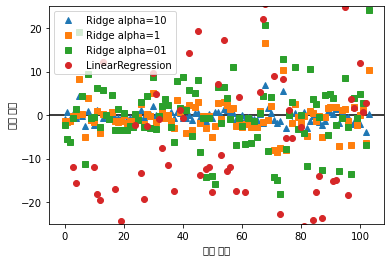

In [11]:
### 알파값에 따른 기울기 정도 파악하는 그래프
plt.plot(ridge10.coef_, '^', label = "Ridge alpha=10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha=1")
plt.plot(ridge01.coef_, 's', label = "Ridge alpha=01")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims= plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()


- x는 coef_의 원소를 위치대로 나열, x= 0 은 첫번째 특성에 연관된 계수 이런식으로 x=100까지 쭈욱

- alpha = 10일 때 대부분 0에 몰려있음

- alpha = 1일 때 10보단 아니지만 그래도 0에 좀 가까이 있음

- alpha = 0.1일 때 0에서 더 멀어져 있음

- 리지가 아닌 LinearRegression 일 때 규제가 없기 때문에 기울기가 0으로 몰려있지 않고 0으로부터 퍼져있음.



### 규제를 이해하는 또 다른 방법 ?

- alpha 값을 고정하고 훈련 데이터의 크기를 변화 시켜 보는 것. 즉 변화시켜볼 수 있는 것은 alpha값이랑 훈련데이터 크기 !

- 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프 = 학습 곡선(learning curve)



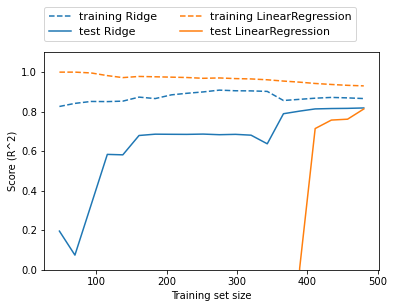

In [12]:
mglearn.plots.plot_ridge_n_samples()

- 예상대로 모든 데이터셋에 대해 리지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높다.

- 리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮다.

- 그러나 테스트 데이터 셋에서는 리지의 점수가 더 높으며 특별히 작은 데이터셋에서는 더 그렇다.

- 데이터셋 크기가 400 미만에서는 선형 회귀는 어떤 것도 학습하지 못하고 있다.

- 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 리지 회귀를 따라잡는다.

- 여기서 배울 수 있는 것 : 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것이라는 것이다.

- 그리고 하나더 ! 훈련 데이터 셋이 많아질수록 훈련 데이터의 성능이 감소한다. 데이터가 많아질수록 모델이 데이터를 기억하거나 

- 과대적합하기가 어려워지기 때문이다 !

### 라소 (Lasso)

- 선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있다. 리지 회귀에서와 같이 라소(lasso)도 계수를 0으로 만들려고 한다.
- 하지만 방식이 조금 다른데 이를 L1규제라고 한다 (리지에서는 L2규제)



- L1 규제의 결과로 인해 어떤 계수는 정말로 0이 되버린다. 이는 아예 없어져버린다는 말 ! 완전히 제외되는 특성이 생긴다.

 --> 특성 선택이(feature selection)이 자동으로 이루어진다 ! 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고,

 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수:",np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


- 결과가 좋지 않다 (훈련 세트와 테스트 세트  모두 !), 이는 과소적합이다. 104개의 특성 중 4개만 사용하였다.

- Ridge와 마찬가지로, Lasso도 얼마나 강하게 계수를 0으로 보낼지를 조절하는 alpha 매개변수를 지원합니다.

- 과소적합을 줄이기 위해 alpha 값을 줄여보자 ! 이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 한다.



In [14]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생한다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 :{:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 :{:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))


훈련 세트 점수 :0.90
테스트 세트 점수 :0.77
사용한 특성의 개수: 33


- alpha값을 낮추면 모델의 복잡도 증가하여 훈련 세트와 테스트 세트에서의 성능이 좋아진다. 성능은 Ridge보다 조금 나은데 사용된 특성은 104개 중 33개뿐이어서, 아마도 모델을 분석하기가 조금 더 쉽다.

- But, alpha 값을 너무 낮추면 규제의 효과가 없어져서 과대적합이 되므로 LinearRegression의 결과와 비슷해진다 !


In [17]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso00001.coef_ != 0))
# aplha값을 너무 낮추게 되었을 때 과대적합 되면서 훈련세트의 점수는 올라가지만 일반화가 제대로 안되어 테스트 세트의 점수가 낮다.

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수 :  96


Text(0, 0.5, '계수 크기')

c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\app\python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\a

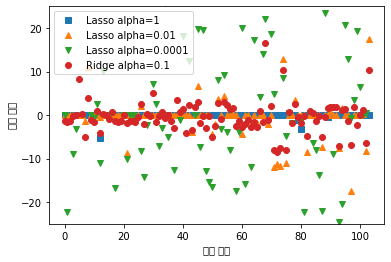

In [20]:
#alpha값이 다른 모델들의 계수를 그래프로 그려보기
plt.plot(lasso.coef_, 's', label = "Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha=0.0001")

plt.plot(ridge.coef_, 'o', label="Ridge alpha=0.1")
plt.legend()
plt.ylim(-25, 25)         
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

- alpha = 1일 때 계수 대부분 0일 뿐만 아니라 나머지 계수들도 크기가 작다.
- alpha = 0.01로 줄이면 대부분 특성이 0이 되는 분포
- alpha = 0.0001이 되면 계수 대부분이 0이 아니고 값도 커져 꽤 규제를 받지 않는다.
- alpha = 0.1인 Ridge 모델은 alpha = 0.01인 라소 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않는다.

- 이 두 모델 중 보통 Ridge 선호
- But 특성이 많고 그중 일부만 중요하다면 Lasso가 더 좋은 선택일 수 있다.
- 분석하기 쉬운 모델을 원한다면 Lasso가 일부 특성만 사용하기 때문에 더 좋을 수 있다.
- ElastcNet : Lasso와 Ridge의 페널티를 결합한 것. 이 조합은 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두개 조정해야한다.